In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf


In [94]:
data = pd.read_csv('Dataset/data.csv')
# data = data.head(10000)
data['Date'] = pd.to_datetime(data['Date'])

data['OnlyDate'] = data['Date'].dt.date
data['OnlyTime'] = data['Date'].dt.time

# Finding the Date Range

In [95]:
print("Min Date:", data['OnlyDate'].min())
print("Max Date:", data['OnlyDate'].max())
print("Range:", data['OnlyDate'].max() - data['OnlyDate'].min())

Min Date: 2024-01-01
Max Date: 2025-09-15
Range: 623 days, 0:00:00


# Finding Returns

In [103]:
data['logReturn'] = np.log(data['Close']/data['Close'].shift(1))
data['logReturn'] = data['logReturn'].fillna(0)
data['Return'] = data['Close'] - data['Close'].shift(1)
data['Return'] = data['Return'].fillna(0)

In [104]:
print("Missing value count by column:")
print(data.isnull().sum())
print("\nDuplicate rows count:", data.duplicated().sum())

Missing value count by column:
Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
OnlyDate     0
OnlyTime     0
logReturn    0
Return       0
dtype: int64

Duplicate rows count: 0


# Plots

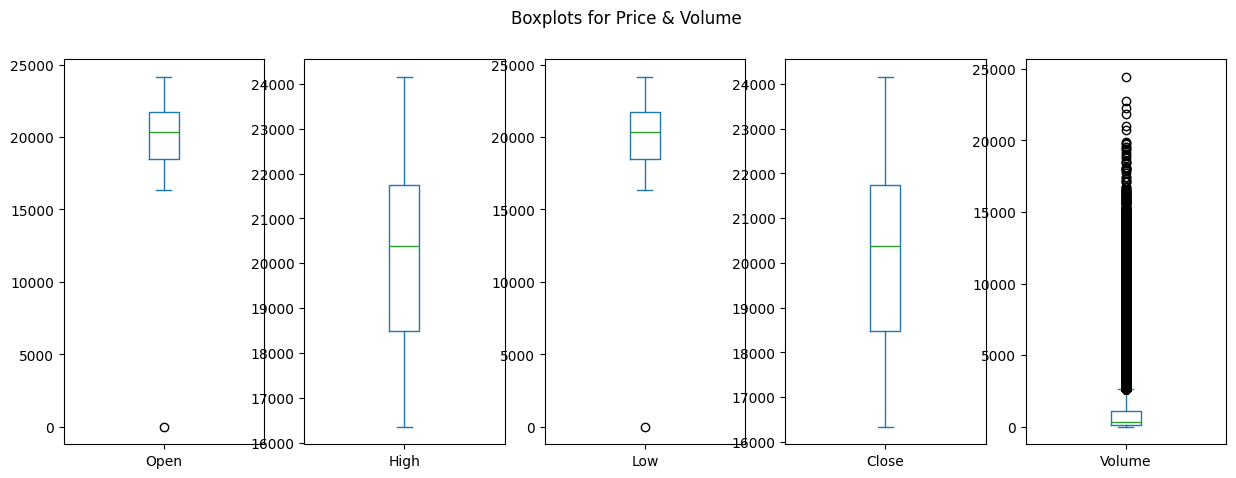

In [98]:
# Outlier boxplots for numeric columns
data[['Open','High','Low','Close','Volume']].plot(kind='box', subplots=True, layout=(1,5), figsize=(15,5))
plt.suptitle("Boxplots for Price & Volume")
plt.show()


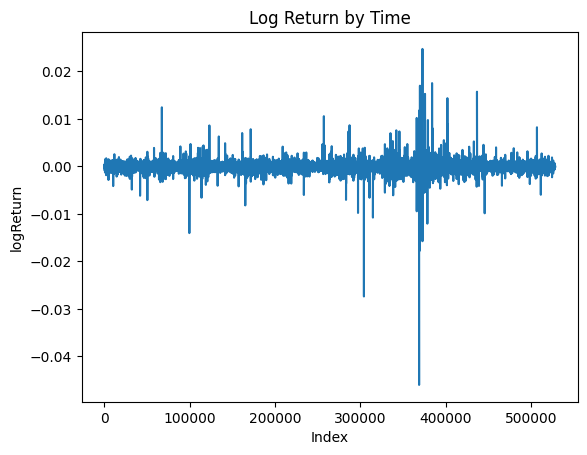

In [99]:
sns.lineplot(y=data['logReturn'], x = data['Index'])
plt.title('Log Return by Time')

plt.savefig('Plots/seaborn_logreturn_plot.png', dpi=600, bbox_inches='tight')
plt.show()


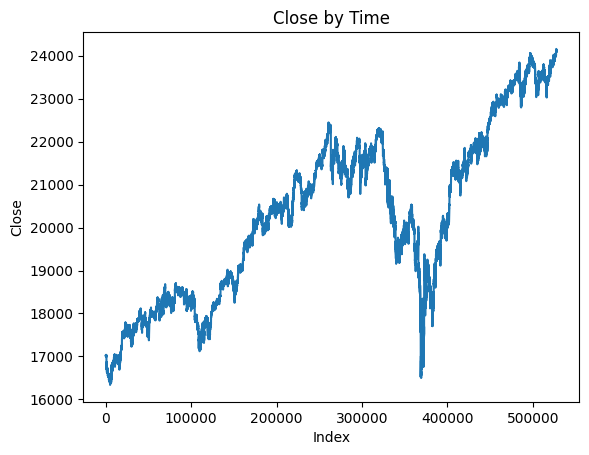

In [100]:
sns.lineplot(y=data['Close'], x = data['Index'])
plt.title('Close by Time')

plt.savefig('Plots/close_plot.png', dpi=600, bbox_inches='tight')
plt.show()


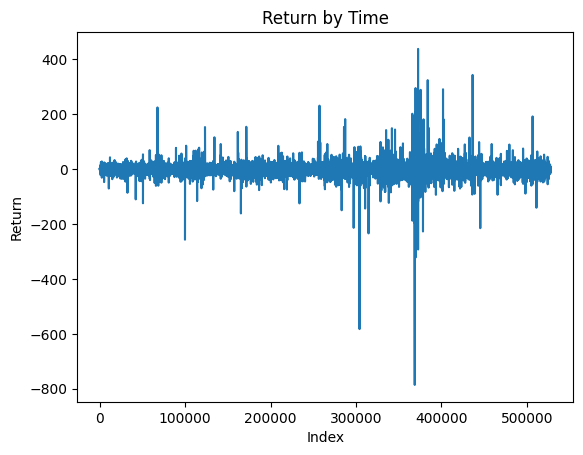

In [101]:
sns.lineplot(y=data['Return'], x = data['Index'])
plt.title('Return by Time')

plt.savefig('Plots/return_plot.png', dpi=600, bbox_inches='tight')
plt.show()

# Dickey-Fuller and ACF & PACF Plots

ADF Statistic: -71.34788430280187
p-value: 0.0
Crit. Value 1%: -3.430362387209557
Crit. Value 5%: -2.8615454750014595
Crit. Value 10%: -2.5667729141431703


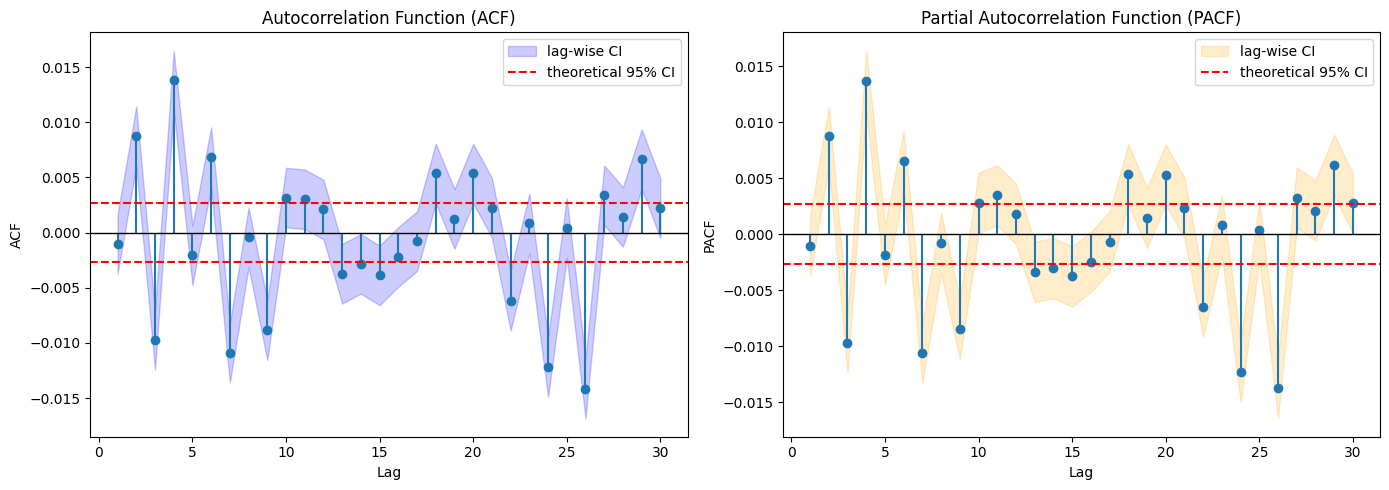

In [ ]:
# Dickey-Fuller Test 
adf_result = adfuller(data['logReturn'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Crit. Value {key}: {value}')

series = data['logReturn']
acf_vals, acf_confint = acf(series, nlags=30, alpha=0.05)
pacf_vals, pacf_confint = pacf(series, nlags=30, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 31)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Theoretical 95% CI (white noise)
N = len(series)
conf = 1.96 / np.sqrt(N)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0], acf_confint[:, 1], color='blue', alpha=0.2, label='lag-wise CI')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[0].axhline(-conf, color='red', linestyle='--')
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
axes[0].legend()

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0], pacf_confint[:, 1], color='orange', alpha=0.2, label='lag-wise CI')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[1].axhline(-conf, color='red', linestyle='--')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
axes[1].legend()

plt.tight_layout()
plt.show()

ADF Statistic: -71.39174391438674
p-value: 0.0
Crit. Value 1%: -3.430362387209557
Crit. Value 5%: -2.8615454750014595
Crit. Value 10%: -2.5667729141431703


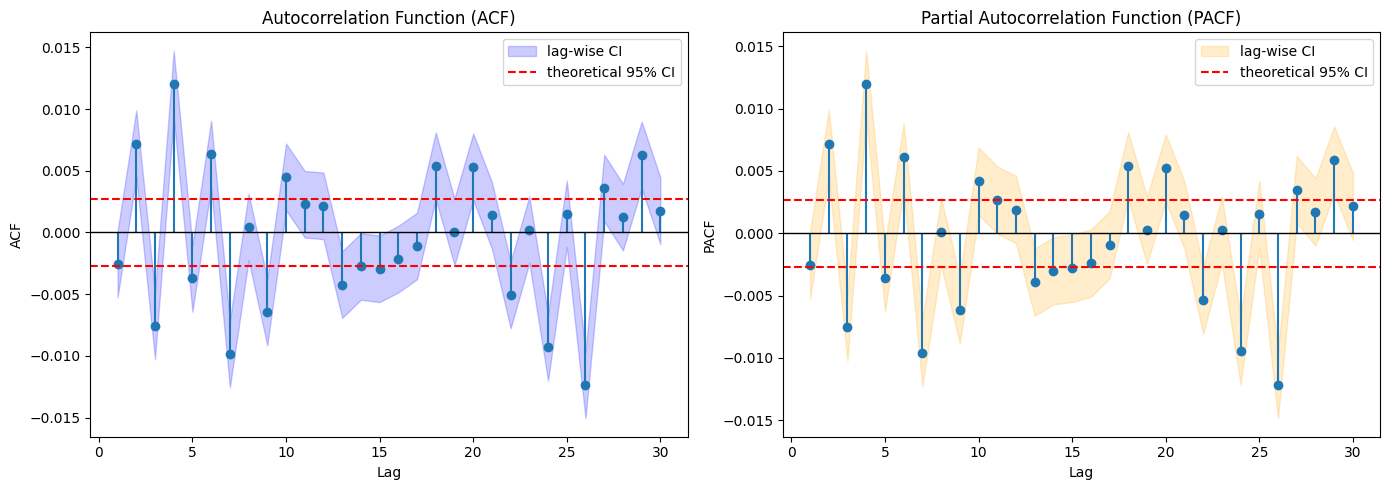

In [105]:
# Dickey-Fuller Test 
adf_result = adfuller(data['Return'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Crit. Value {key}: {value}')

series = data['Return']
acf_vals, acf_confint = acf(series, nlags=30, alpha=0.05)
pacf_vals, pacf_confint = pacf(series, nlags=30, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 31)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Theoretical 95% CI (white noise)
N = len(series)
conf = 1.96 / np.sqrt(N)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0], acf_confint[:, 1], color='blue', alpha=0.2, label='lag-wise CI')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[0].axhline(-conf, color='red', linestyle='--')
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
axes[0].legend()

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0], pacf_confint[:, 1], color='orange', alpha=0.2, label='lag-wise CI')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[1].axhline(-conf, color='red', linestyle='--')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
axes[1].legend()

plt.tight_layout()
plt.show()

### Interpretation: 
This means the log returns series and the returns series are strongly stationary.
Although, there are no major correlations when computing lag-wise CI, there are some when we take a const theoretical 95 percent CI.



In [106]:


def _shannon_entropy(x: np.ndarray, bins: int = 30, normalize: bool = True) -> float:
 
    x = np.asarray(x, dtype=float)
    if np.allclose(np.std(x), 0):
        x = x + 1e-12 * np.random.randn(*x.shape)  # éviter variance nulle
    counts, _ = np.histogram(x, bins=bins)
    p = counts / counts.sum()
    p = p[p > 0]  # éviter log(0)
    H = -np.sum(p * np.log2(p))
    if not normalize:
        return float(H)
    Hmax = np.log2(len(counts))
    return float(H / Hmax) if Hmax > 0 else np.nan

In [110]:
print(_shannon_entropy(data['Close']))
print(_shannon_entropy(data['logReturn']))
print(_shannon_entropy(data['Return']))


0.9596191088131241
0.021574951079121076
0.05258686931242345


In [111]:
def _hurst_exponent_rs(x: np.ndarray, min_window: int = 16) -> float:

    x = np.asarray(x, dtype=float)
    x = x - np.mean(x)
    N = len(x)
    max_window = N // 2
    sizes = np.floor(np.logspace(np.log10(min_window), np.log10(max_window), num=10)).astype(int)

    RS = []
    for w in sizes:
        if w < 2:
            continue
        n_seg = N // w
        rs_vals = []
        for i in range(n_seg):
            seg = x[i*w:(i+1)*w]
            Y = np.cumsum(seg - np.mean(seg))
            R = np.max(Y) - np.min(Y)
            S = np.std(seg)
            if S > 0:
                rs_vals.append(R / S)
        if rs_vals:
            RS.append((w, np.mean(rs_vals)))

    if not RS:
        return np.nan
    w_arr, rs_arr = zip(*RS)
    H, _ = np.polyfit(np.log(w_arr), np.log(rs_arr), 1)
    return float(H)

In [112]:
print(_hurst_exponent_rs(data['Close']))
print(_hurst_exponent_rs(data['logReturn']))
print(_hurst_exponent_rs(data['Return']))

1.0061830871513264
0.5192983891647469
0.5199533356432576


In [113]:
def _mutual_information_norm(x: np.ndarray, y: np.ndarray, bins: int = 30) -> float:

    counts_x, _ = np.histogram(x, bins=bins)
    counts_y, _ = np.histogram(y, bins=bins)
    counts_xy, _, _ = np.histogram2d(x, y, bins=(bins, bins))

 
    def H(counts):
        p = counts / counts.sum()
        p = p[p > 0]
        return -np.sum(p * np.log2(p))

    Hx = H(counts_x)
    Hy = H(counts_y)
    Hxy = H(counts_xy.ravel())

    MI = Hx + Hy - Hxy
    return float(MI / Hx) if Hx > 0 else np.nan

In [114]:
def detect_risk_factors(returns: np.ndarray,
                        bins: int = 30,
                        mi_lag: int = 1) -> dict:
    H_ent = _shannon_entropy(returns, bins=bins, normalize=True)
    mi_norm = _mutual_information_norm(returns[mi_lag:], returns[:-mi_lag], bins=bins)
    hurst = _hurst_exponent_rs(returns)

    risk_flag = "latent"
    if hurst > 0.5 and H_ent > 0.9 and mi_norm < 0.05:
        risk_flag = "structural_time_bomb"
    elif hurst > 0.5 and H_ent > 0.9:
        risk_flag = "chaotic_memory"
    elif mi_norm < 0.05:
        risk_flag = "blocked_flow"

    return {
        "entropy": H_ent,
        "mi_norm": mi_norm,
        "hurst": hurst,
        "risk_flag": risk_flag
    }

In [115]:
print(detect_risk_factors(data['Close']))
print(detect_risk_factors(data['logReturn']))
print(detect_risk_factors(data['Return']))

{'entropy': 0.9596191088131241, 'mi_norm': 0.9747475162149335, 'hurst': 1.0061830871513264, 'risk_flag': 'chaotic_memory'}
{'entropy': 0.021574951079121076, 'mi_norm': 0.08959193890488351, 'hurst': 0.5192983891647469, 'risk_flag': 'latent'}
{'entropy': 0.05258686931242345, 'mi_norm': 0.05303773365454187, 'hurst': 0.5199533356432576, 'risk_flag': 'latent'}
